**1. Importar bibliotecas e carregar os dados**
---
---

Importamos as bibliotecas necessárias (TensorFlow/Keras, Matplotlib, etc.) e carregamos o dataset MNIST. <br>
**Por que:** <br>
- Preparar o ambiente e obter os dados (imagens 28×28 de dígitos manuscritos) que serão usados no experimento.

**O que observar:** <br>
- mnist.load_data() retorna (X_train, y_train), (X_test, y_test) | já divide em treino e teste.
- Verifique formatos e tamanhos | Cada imagem possui formato 28×28 pixels em escala de cinza.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar o MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Formato do X_train:", X_train.shape)
print("Formato do y_train:", y_train.shape)

Formato do X_train: (60000, 28, 28)
Formato do y_train: (60000,)


**2. Pré-processamento (normalização + reshape + one-hot encoding)**
---
---

Normalizamos valores de pixel para [0,1], achatamos as imagens em vetores 1D (784 features) e convertimos rótulos para one-hot. <br>
**Por que:** <br>
- Normalização ajuda a estabilizar e acelerar o treinamento; a MLP espera vetores 1D; one-hot é exigido para categorical_crossentropy.

**O que observar:** <br>
- Confirme shapes após cada transformação (ex.: (n_samples, 784) e (n_samples, 10)).

**2.1 Normalização**

In [3]:
# Transformamos os valores de 0–255 para 0–1:
X_train = X_train / 255.0
X_test = X_test / 255.0

**2.2 Flatten (MLP exige vetor 1D)**

In [4]:
# MLP não aceita imagens 2D diretamente, então achatamos
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

**2.3 One-hot encoding dos rótulos**

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**3. Construção do modelo MLP**
---
---

Definimos a arquitetura sequencial da rede: camadas Dense + Dropout + camada de saída Softmax. <br>
**Por que:** <br>
- Camadas densas permitem aprender combinações lineares não lineares das features.
- Dropout reduz overfitting.
- Softmax gera probabilidades para cada classe.

**O que observar:** <br>
- Número de neurônios e ativação (ReLU para hidden layers, softmax na saída).

In [6]:
'''
Modelo básico recomendado:
- 1ª camada densa (relu): 256 neurônios
- Dropout para reduzir overfitting
- 2ª camada densa (relu): 128 neurônios
- Camada de saída: 10 neurônios (softmax)'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**4. Compilar o modelo**
---
---

Selecionamos o otimizador (Adam), função de perda (categorical_crossentropy) e métricas (accuracy). <br>
**Por que:** <br>
- Compilação define como os pesos serão atualizados e como o desempenho será medido.

**O que observar:** <br>
- Parâmetros do otimizador e tipo de perda compatível com one-hot.

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**5. Treinar o modelo**
---
---

Chamamos model.fit() com os dados de treino, definindo epochs, batch_size e validation_split. <br>
**Por que:** <br>
- Ajustar os pesos da rede aos dados; validação interna permite monitorar generalização durante o treinamento.

**O que observar:** <br>
- Histórico retornado (history) contém loss e accuracy por época para treino e validação.

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8079 - loss: 0.6286 - val_accuracy: 0.9682 - val_loss: 0.1158
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9559 - loss: 0.1513 - val_accuracy: 0.9763 - val_loss: 0.0856
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9683 - loss: 0.1066 - val_accuracy: 0.9772 - val_loss: 0.0730
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9723 - loss: 0.0840 - val_accuracy: 0.9808 - val_loss: 0.0658
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9788 - loss: 0.0693 - val_accuracy: 0.9807 - val_loss: 0.0684
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9803 - loss: 0.0629 - val_accuracy: 0.9815 - val_loss: 0.0645
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9822 - val_loss: 0.0619
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9843 - loss: 0.0465 - val_accuracy:

**6. Avaliar o modelo**
---
---

Avaliamos o desempenho final no conjunto de teste com model.evaluate(). <br>
**Por que:** <br>
- Medir a performance em dados não vistos para estimar a generalização real do modelo.

**O que observar:** <br>
- Acurácia (accuracy) e loss no conjunto de teste — principais métricas a relatar.

In [9]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Acurácia no teste: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0810
Acurácia no teste: 0.9813


**7. Fazer previsões e visualizar**
---
---


Usar model.predict() em amostras do conjunto de teste e exibir imagens com as previsões. <br>
**Por que:** <br>
- Visualizar predições ajuda a interpretar erros e acertos do modelo (ex.: confundir 5 com 6).

**O que observar:** <br>
Probabilidades preditas, rótulo predito (argmax) e rótulo verdadeiro.

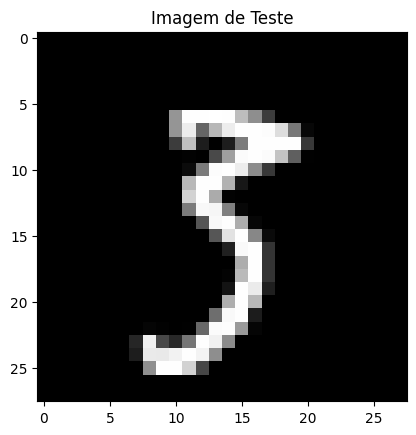

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Probabilidades: [[3.5028869e-10 6.8833444e-08 1.9103750e-08 9.9548316e-01 1.1945071e-11
  4.5043644e-03 1.3243839e-12 1.4813596e-08 6.4099218e-06 6.1010219e-06]]
Dígito previsto: 3


In [10]:
import numpy as np

# Escolher imagem aleatória
idx = np.random.randint(0, X_test.shape[0])
img = X_test[idx].reshape(28, 28)

plt.imshow(img, cmap="gray")
plt.title("Imagem de Teste")
plt.show()

# Fazer previsão
pred = model.predict(X_test[idx].reshape(1, 784))
print("Probabilidades:", pred)
print("Dígito previsto:", np.argmax(pred))

**8. Análise Gráfica do Treinamento**
---
---



Plotar history.history['loss'], ['val_loss'], ['accuracy'], ['val_accuracy']. <br>
**Por que:** <br>
- Verificar tendências de aprendizado, identificar overfitting (treino ↑, val ↓) ou underfitting (ambas baixas/estagnadas).

**O que observar:** <br>
- Divergência entre treino e validação, platôs, e estabilidade das curvas.

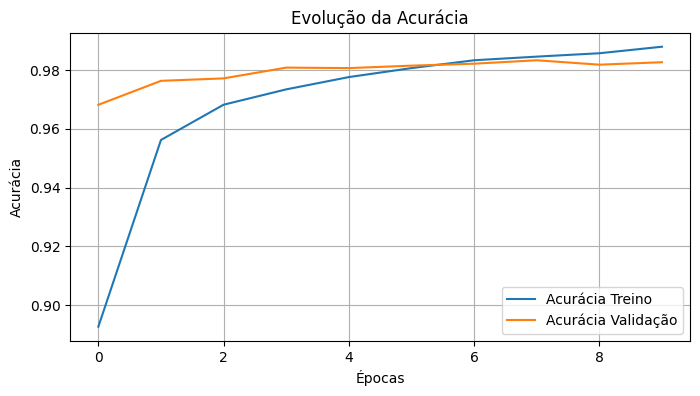

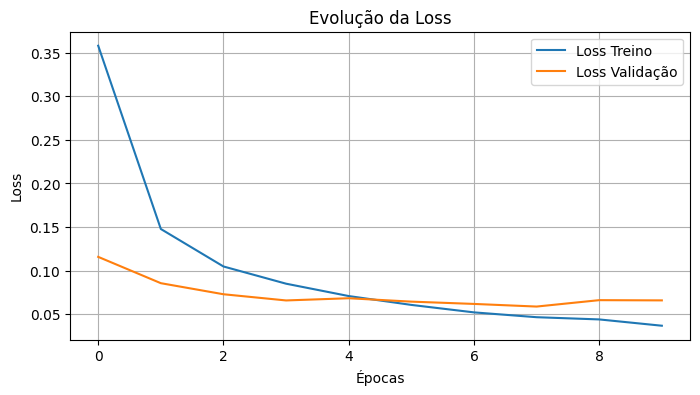

In [11]:
'''
Nesta seção são apresentadas as curvas de acurácia e loss obtidas durante o treinamento do modelo.

Essas visualizações permitem avaliar:
- A evolução do aprendizado ao longo das épocas
- Se o modelo apresentou overfitting ou underfitting
- A diferença entre desempenho de treino e validação
'''

import matplotlib.pyplot as plt

# Gráfico da acurácia
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico da perda (loss)
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Loss Treino')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução da Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação dos Gráficos**

- Uma acurácia crescente ao longo das épocas indica que o modelo está aprendendo.
- Uma diferença muito grande entre acurácia/loss de treino e validação pode indicar overfitting.
- Uma loss que não diminui ou acurácia que estabiliza muito cedo pode indicar underfitting.
- Se as curvas de treino e validação seguem padrões parecidos, o modelo está generalizando bem.

**9. Observações e boas práticas rápidas**
---
---

- Sempre rode as células na ordem e reinicie o ambiente se algo ficar inconsistente.
- Salve uma captura de tela do Colab com resultados e gráficos para anexar ao relatório.
- Se houver forte overfitting, experimente aumentar Dropout, reduzir neurônios ou usar mais dados/regularização.
- Para imagens, CNNs costumam superar MLPs; considere isso como sugestão para trabalhos futuros.